# Аналитика в авиакомпании

***Описание проекта***
    Для анализа представлены датасеты с информацией о рейсах, моделях самолетов, городах вылета. Необходимо импортировать файлы,  изучить данные в них, проверить типы данных на корректность, выбрать топ-10 городов по количеству рейсов, построить графики: модели самолетов и количество рейсов, топ-10 городов и количество рейсов, сделать выводы по каждому из графиков, пояснить результат.

***Краткое описание данных, представленных в датасетах***:

**dataset1** количество рейсов для разных моделей самолетов в сентябре 2018 года:

    model — модель самолета
    flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года
    
**dataset2** среднее количество рейсов, прибывающих в город city за день в августе 2018 года:

    city — город
    average_flights — среднее количество рейсов, прибывающих в город city за день в августе 2018 года

***Содержание проекта***

1. <a href='#the_destination'>Анализ исходных данных</a>

    1.1  <a href='#the_destination2'>Загрузка необходимых библиотек</a>

    1.2 <a href='#the_destination3'>Загрузка датасета1 и предварительный анализ</a>
 
    1.3 <a href='#the_destination4'>Загрузка датасета2 и предварительный анализ</a>
    
    1.4 <a href='#the_destination5'>Изменение типов данных датасета2</a>
    
<a href='#the_destination6'>Вывод по разделу 1</a>

2. <a href='#the_destination7'>Исследовательский анализ данных</a>
    
    2.1. <a href='#the_destination8'>Анализ взаимосвязи моделей самолетов и количества рейсов</a>
    
    2.2. <a href='#the_destination9'>Анализ взаимосвязи города, расположения аэропорта, и количества рейсов</a>
    
    2.2.1. <a href='#the_destination10'>Выбор топ-10 городов по количеству рейсов</a>
    
    2.2.2. <a href='#the_destination11'>Построение графиков для топ-10 городов по количеству рейсов</a>

<a href='#the_destination12'>Вывод по разделу 2</a>

<a href='#the_destination13'>Общий вывод</a>   


<a id='the_destination'></a>
# 1. Анализ исходных данных.

<a id='the_destination2'></a>
## 1.1. Загрузка необходимых библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import plotly
import plotly.express as px

<a id='the_destination3'></a>
## 1.2. Загрузка датасета1 и предварительный анализ

Для оценки данных, содержащихся в датасете, загрузим данные при помощи библиотеки pandas, далее произведем оценку
количества пропущенных значений, вызывав метод info, после чего оценим первые 10 строк, произведя вывод их на экран
методом head. Проверку на дубликаты осуществим методом duplicated().sum().

In [2]:
# Загрузка датасета
aircrafts_data = pd.read_csv('/datasets/query_1.csv')
# Вызов данных о датасете
aircrafts_data.info()
# Вывод первых 20 строк
display(aircrafts_data.head(10))
# Проверка на наличие дубликатов
print('Количество дубликатов', aircrafts_data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Количество дубликатов 0


Данные выглядят корректно - количество полетов отражается в виде переменной int64, тип модели - строковой переменной, пропусков или дублирующих данных в таблице нет.

<a id='the_destination4'></a>
## 1.3. Загрузка датасета 2 и предварительный анализ

In [3]:
# Загрузка датасета
flights_data = pd.read_csv('/datasets/query_3.csv')
# Вызов данных о датасете
flights_data.info()
# Вывод первых 20 строк
display(flights_data.head(10))
# Проверка на наличие дубликатов
print('Количество дубликатов', flights_data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


Количество дубликатов 0


Данные выглядят корректно - среднее количество полетов отражается в виде переменной  float64, тип модели - строковой переменной, пропусков или дублирующих данных в таблице нет. Так как в дальнейшем мы будем обрабатывать и строить графики по количеству рейсов, то целесообразно округлить среднее количество рейсов до целочисленного значения и перевести в тип int64.

<a id='the_destination5'></a>
## 1.4. Изменения типа данных датасета2

In [4]:
# Округление значения среднего количества вылетов до целого числа
flights_data['average_flights'] = flights_data['average_flights'].round()
flights_data['average_flights'] = flights_data['average_flights'].astype('int64', errors='raise')
display(flights_data.head())
flights_data.info()

,city,average_flights
0,Абакан,4
1,Анадырь,1
2,Анапа,2
3,Архангельск,5
4,Астрахань,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


<a id='the_destination6'></a>
# Вывод по разделу 1

Был осуществлен импорт таблиц, проверена корректность данных. Данные в таблицах корректны, пропусков и дубликатов не обнаружено. Для датасета, содержащего информацию о среднем количестве полетов была осуществлена замена типа данных столбца количество полетов на целочисленное значение. 

<a id='the_destination7'></a>
# 2. Исследовательский анализ данных

In [5]:
def plot_names(ax, title, x_label, y_label):
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True)

<a id='the_destination8'></a>
## 2.1. Анализ взаимосвязи моделей самолетов и количества рейсов

In [6]:
#добавление столбца с % полетов с разными моделями
aircrafts_data['percentage_of_flights'] = aircrafts_data['flights_amount'] * 100 / sum(aircrafts_data['flights_amount'])
aircrafts_data['percentage_of_flights'] = aircrafts_data['percentage_of_flights'].round(decimals=2)
display(aircrafts_data)

,model,flights_amount,percentage_of_flights
0,Airbus A319-100,607,3.73
1,Airbus A321-200,960,5.89
2,Boeing 737-300,630,3.87
3,Boeing 767-300,600,3.68
4,Boeing 777-300,300,1.84
5,Bombardier CRJ-200,4446,27.30
6,Cessna 208 Caravan,4557,27.98
7,Sukhoi SuperJet-100,4185,25.70


In [7]:
#cоздание таблицы с объединенными ячейками
aircrafts_data_upd = aircrafts_data.loc[5:, ['model', 'flights_amount', 'percentage_of_flights']]
aircrafts_data_upd.loc[3, 'model'] = 'Airbus'
aircrafts_data_upd.loc[3, 'flights_amount'] = aircrafts_data.loc[0, 'flights_amount'] + aircrafts_data.loc[1, 'flights_amount']
aircrafts_data_upd.loc[3, 'percentage_of_flights'] = aircrafts_data.loc[0, 'percentage_of_flights'] + aircrafts_data.loc[1, 'percentage_of_flights']
aircrafts_data_upd.loc[4, 'model'] = 'Boeing'
aircrafts_data_upd.loc[4, 'flights_amount'] = aircrafts_data.loc[2, 'flights_amount'] + aircrafts_data.loc[3, 'flights_amount']+ aircrafts_data.loc[4, 'flights_amount']
aircrafts_data_upd.loc[4, 'percentage_of_flights'] = aircrafts_data.loc[2, 'percentage_of_flights'] + aircrafts_data.loc[3, 'percentage_of_flights']+ aircrafts_data.loc[4, 'percentage_of_flights']


Для визуальной оценки взаимосвязи количества рейсов и типа моделей на основании данных датасета aircraft_data построим график распределения полетов.

In [8]:
# Сортировка таблицы по убыванию
aircrafts_data_upd.sort_values(by='flights_amount', ascending=False, inplace=True)
# Обновление индексов
aircrafts_data_upd.reset_index(inplace=True)
display(aircrafts_data_upd)

,index,model,flights_amount,percentage_of_flights
0,6,Cessna 208 Caravan,4557.0,27.98
1,5,Bombardier CRJ-200,4446.0,27.30
2,7,Sukhoi SuperJet-100,4185.0,25.70
3,3,Airbus,1567.0,9.62
4,4,Boeing,1530.0,9.39


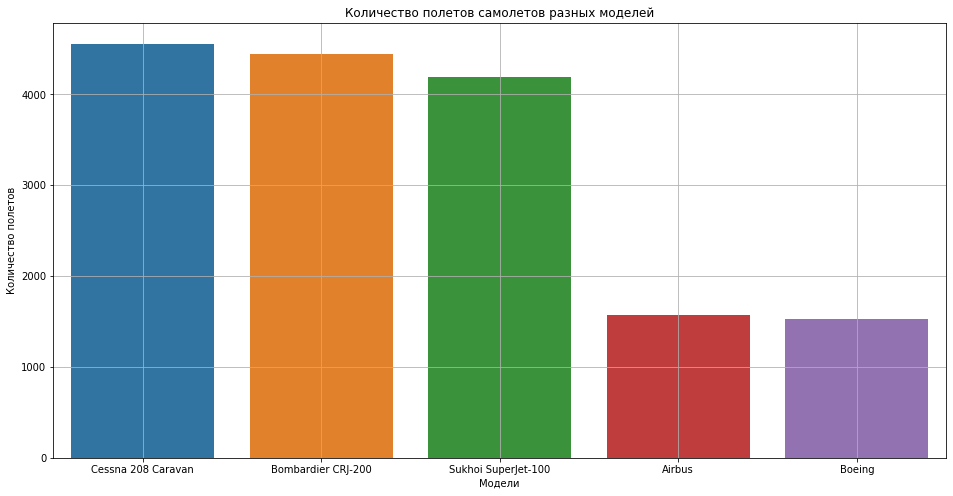

In [9]:
# построение графика количества полетов самолетов разных моделей
# создание иллюстрации
fig = plt.figure(figsize=(16, 8))
# добавление одного графика на иллюстрацию
graph = fig.add_subplot()
# создание графика
sns.barplot(x='model', y='flights_amount', data=aircrafts_data_upd, ax=graph)
# создание названий
plot_names(graph, 'Количество полетов самолетов разных моделей', 'Модели', 'Количество полетов')

<a class="anchor" id="0-bullet">

In [10]:
# создание таблицы малой авиации и авиации общего назначения
array = aircrafts_data_upd.values
print(array)
avia_small = array[0, 2]
avia_small_per=array[0, 3]
avia_business = array[1, 2]
avia_business_per=array[1, 3]
avia_all_purpose = sum(array[2:, 2])
avia_all_purpose_per=sum(array[2:, 3])
aviation = pd.DataFrame([['малая авиация', avia_small, avia_small_per],
                         ['деловая авиация', avia_business, avia_business_per],
                         ['авиация общего назначения', avia_all_purpose, avia_all_purpose_per]],
                        columns=['type','flights_amount','flights_percentage'])
display(aviation)

[[6 'Cessna 208 Caravan' 4557.0 27.98]
 [5 'Bombardier CRJ-200' 4446.0 27.3]
 [7 'Sukhoi SuperJet-100' 4185.0 25.7]
 [3 'Airbus' 1567.0 9.62]
 [4 'Boeing' 1530.0 9.39]]


,type,flights_amount,flights_percentage
0,малая авиация,4557.0,27.98
1,деловая авиация,4446.0,27.30
2,авиация общего назначения,7282.0,44.71


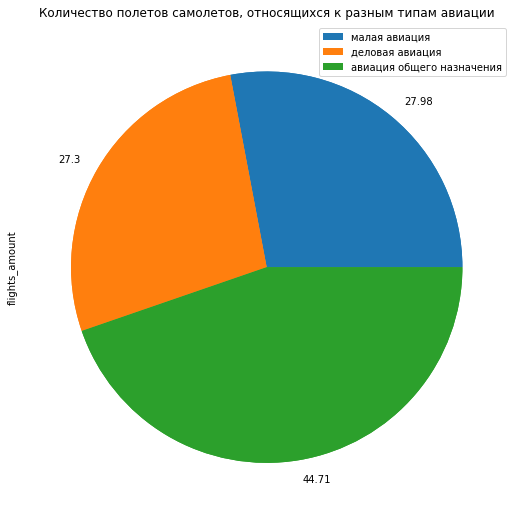

In [11]:
# cоздание круговой диаграммы типов авиации
plot = aviation.plot.pie(y='flights_amount', figsize=(9, 9), labeldistance=None, labels=None)
values = aviation['flights_amount']
plt.pie(values, labels=aviation['flights_percentage'])
plt.title('Количество полетов самолетов, относящихся к разным типам авиации')
plt.legend(aviation['type'], loc=0)
plt.show()

***Для удобства в таблице объединили все сведения о моделях Airbus и Boeing были объединены, значения отсортированы по убыванию и построена диаграмма с количеством полетов разных моделей. После чего было принято решение проанализировать количество самолетов, относящихся к разным типам авиации - малой (до 9 мест, в основном частные и учебные полеты), деловой (до 50 мест, в основном корпоративные перелеты, перелеты официальных лиц и тд) и общего назначения (более 50 мест в самолете). Несмотря на то, что деловая и малая авиация занимают значительный сегмент полетов, однако все же полеты общего назначения представляют наибольшее количество полетов (44,71%).***

<a id='the_destination9'></a>
## 2.2. Анализ взаимосвязи города расположения аэропорта и количества рейсов

<a id='the_destination10'></a>
### 2.2.1. Выбор топ-10 городов по количеству рейсов

In [12]:
# Сортировка таблицы по убыванию
flights_data.sort_values(by='average_flights', ascending=False, inplace=True)
# Обновление индексов
flights_data.reset_index(inplace=True)
# ТОП-10 городов
display(flights_data.head(10))
# Запись топ-10 городов в массив
top_ten = flights_data.loc[0:9]


,index,city,average_flights
0,43,Москва,130
1,70,Санкт-Петербург,31
2,54,Новосибирск,17
3,33,Красноярск,12
4,20,Екатеринбург,11
5,67,Ростов-на-Дону,10
6,74,Сочи,10
7,84,Ульяновск,10
8,63,Пермь,10
9,10,Брянск,10


Для определения топ-10 городов по количеству рейсов сначала была использована функция sort_values, а затем извлечен срез для 10 городов для удобства построения графиков.

<a id='the_destination11'></a>
### 2.2.2. Построение графиков для топ-10 городов по количеству рейсов

,index,city,average_flights,percentage_of_flights
0,43,Москва,130,51.79
1,70,Санкт-Петербург,31,12.35
2,54,Новосибирск,17,6.77
3,33,Красноярск,12,4.78
4,20,Екатеринбург,11,4.38
5,67,Ростов-на-Дону,10,3.98
6,74,Сочи,10,3.98
7,84,Ульяновск,10,3.98
8,63,Пермь,10,3.98
9,10,Брянск,10,3.98


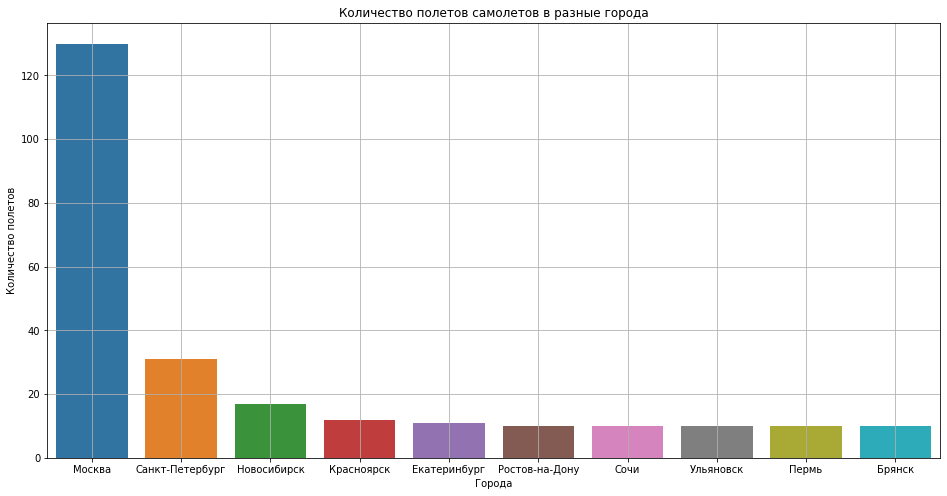

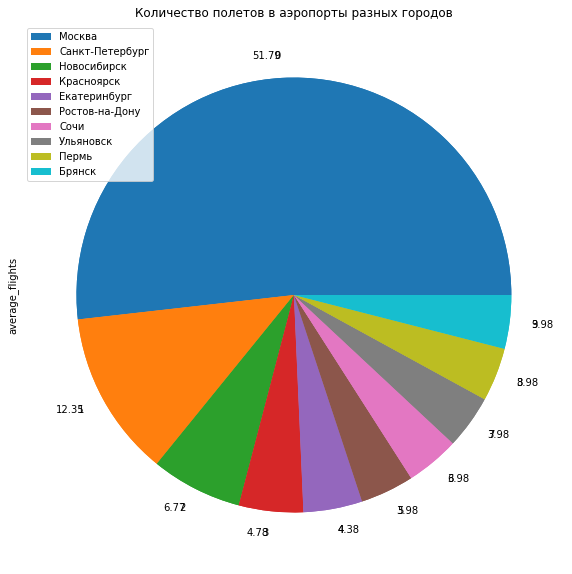

In [13]:
# построение графика количества полетов самолетов разных моделей
# создание иллюстрации
fig = plt.figure(figsize=(16, 8))
# добавление одного графика на иллюстрацию
graph = fig.add_subplot()
# создание графика
sns.barplot(x='city', y='average_flights', data=top_ten, ax=graph)
# создание названий
plot_names(graph, 'Количество полетов самолетов в разные города', 'Города', 'Количество полетов')

#добавление столбца с % полетов в разные города
top_ten['percentage_of_flights'] = top_ten['average_flights'] * 100 / sum(top_ten['average_flights'])
top_ten['percentage_of_flights'] = top_ten['percentage_of_flights'].round(decimals=2)                                                                                       
display(top_ten)
#построение круговой диаграммы

plot = top_ten.plot.pie(y='average_flights', figsize=(10, 10))
values = top_ten['average_flights']
labels = top_ten['city']
plt.pie(values, labels= top_ten['percentage_of_flights'])
plt.title('Количество полетов в аэропорты разных городов')
plt.legend(labels, loc=2)
plt.show()

Как на круговой диаграмме, так и на графике видно, что большинство полетов совершалось в Москву, Санкт-Петербург и Новосибирск. Это самые крупные города России, поэтому подобная динамика коррелирует с данными о перелетах  - большинство пересадок также осуществляется через Санкт-Петербург, Москву или Новосибирск, поэтому нагрузка на аэропорты этих городов выше.

<a id='the_destination12'></a>
# Вывод по разделу 2

Наиболее нагруженные в исследуемый день в августе являются аэропорты Москвы, Санкт-Петербурга, Новосибирска, Красноярска, Екатеринбурга, Ростов-на-Дону	, Сочи, Ульяновска, Перми, Брянска. Наиболее загруженная (более 50% вылетов) является Москва, также значительное количество вылетов осуществляется из Санкт-Петербурга и Новосибирска, что связано как с высоким населением этих городов, так и с осуществлением пересадочных рейсов в них.

<a id='the_destination13'></a>
# Общий вывод

В сентябре 2018  основная масса полетов приходилась на частные и официальные перелеты (более 50%).Больше всего полетов в сентябре 2018 года было совершенно на Cessna 208 Caravan и Bombardier CRJ200, на третьем месте находится Superjet-100. 
В августе наиболее загруженным аэропортом являлась Москва, что связано как с высоким населением , так и с осуществлением пересадочных рейсов в ней. Также высоко загруженными являются аэропорты Санкт-Петербурга, Новосибирска, Красноярска, Екатеринбурга, Ростов-на-Дону	, Сочи, Ульяновска, Перми, Брянска. 